# Introduction to [stylometry](https://en.wikipedia.org/wiki/Stylometry) with Python
> You will learn to conduct ‘stylometric analysis’ on texts and determine authorship of disputed texts.
- toc: true 
- badges: true
- comments: true
- author: Zeyu Guan
- categories: [spaCy, Python, Machine Learning, Data Mining, NLP, RandomForest]
- annotations: true
- image: https://www.uni-potsdam.de/fileadmin/projects/digital-humanities/migrated_contents/Sur_Item_Pub_on_first_network.jpg
- hide: false

## Packages:
[Federalist Papers](https://programminghistorian.org/assets/introduction-to-stylometry-with-python/stylometry-federalist.zip)

[Python](https://www.python.org/downloads/)

[nltk](https://www.nltk.org/)

[matplotlib](https://matplotlib.org/)

## Background
Stylometry is a linguistic discipline that assesses an author's style by applying statistical analysis to a body of work. It is typically applied to written language, but it has also been successfully applied to music and fine-art paintings.

Authorship attribution is one of the most common uses of stylometry. It is sometimes possible to guess who wrote an anonymous text by measuring certain features, such as the average number of words per sentence or the author's proclivity to use "while" instead of "whilst," and comparing the measurements to other texts written by the suspected author. This is what we will do in this lesson, using perhaps the most famous example of disputed authorship in political writing history, the Federalist Papers, as our test case.

[The Federalist Papers](https://en.wikipedia.org/wiki/The_Federalist_Papers) are 85 articles and essays written by [Alexander Hamilton](https://en.wikipedia.org/wiki/Alexander_Hamilton), [James Madison](https://en.wikipedia.org/wiki/James_Madison), and [John Jay](https://en.wikipedia.org/wiki/John_Jay) under the pen name "Publius" to promote the ratification of the United States Constitution. The collection was known as The Federalist until the name The Federalist Papers was coined in the twentieth century, and it is sometimes described as America’s greatest and most lasting contribution to the field of political philosophy.

In the eighteenth century, anonymous publication was common, especially for politically sensitive material. However, in the case of the Federalist, the fact that three people shared a single pseudonym. Thus, who wrote which of the papers has been a source of contention for the past 150 years. 

Mosteller and David Lee Wallace10 devised a relatively satisfactory solution to the mystery using word usage statistics in 1964. The authorship of the Federalist has remained a common test case for machine learning algorithms in the English-speaking world since then.

Our first two tests will look at the 12 disputed papers as a group, using T. C. Mendenhall's characteristic curves of composition and Adam Kilgariff's chi-squared distance, to see if they resemble anyone's writing in particular. Then, in our third and final test, we will use John Burrows' Delta method to examine Federalist 64 and determine whether or not it was written by John Jay.

# Data cleaning

In [2]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}

In [3]:
# A function that compiles all of the text files associated with a single author into a single string
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt') as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [4]:
# Make a dictionary out of the authors' corpora
federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)

In [5]:
for author in papers:
    print(federalist_by_author[author][:100])

 10

The Same Subject Continued (The Union as a Safeguard Against Domestic
Faction and Insurrection)
 1

General Introduction

For the Independent Journal. Saturday, October 27, 1787


HAMILTON

To the
 2

Concerning Dangers from Foreign Force and Influence

For the Independent Journal. Wednesday, Oct
 18

The Same Subject Continued (The Insufficiency of the Present
Confederation to Preserve the Unio
 49

Method of Guarding Against the Encroachments of Any One Department of
Government by Appealing t
 64

The Powers of the Senate

From The Independent Journal. Wednesday, March 5, 1788.

JAY

To the 


# Mendenhall’s Characteristic Curves of Composition
Mendenhall's methos nowadays looks very limited. He believes that each writer's writing style could be find by calculating the frequency with which he or she used words of various lengths. In that case, we can find that author "A" particularly like to use words with 5 or anyother number of charactors. That is his or her secrete key. The main issue with this approach is that Mendenhall's method does not take into account the actual words in an author's vocabulary.

In the cell below, we first uses nltk's word tokenize() method to break down an author's corpus into its component tokens, such as words, numbers, punctuation, and so on. Second, we eliminates non-words and generates a list containing the lengths of each remaining word token. Next, it generates a frequency distribution object and count the number of one-letter words, two-letter words, and so on in the author's corpus. Eventually, it creates a graph of the distribution of word lengths in the corpus for all words up to 15 characters long.

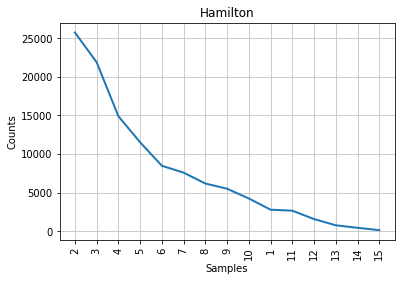

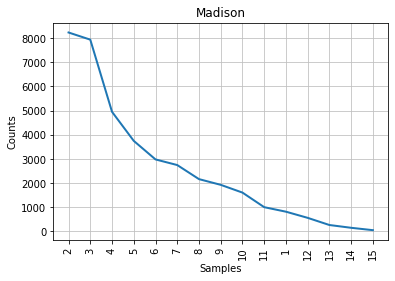

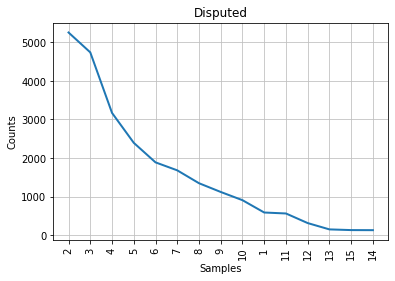

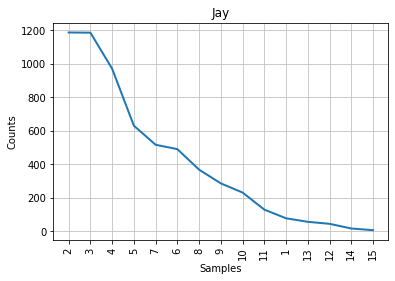

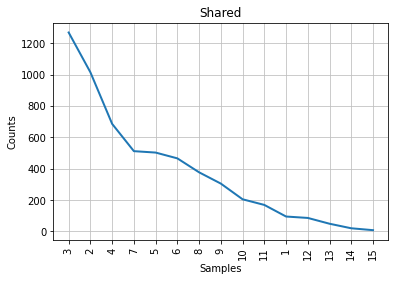

In [6]:
# Load nltk
import nltk
%matplotlib inline

# Compare the disputed papers to those written by everyone,
# including the shared ones.
authors = ("Hamilton", "Madison", "Disputed", "Jay", "Shared")

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(federalist_by_author[author])

    # Filter out punctuation
    federalist_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])

    # Get a distribution of token lengths
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    federalist_by_author_length_distributions[author].plot(15,title=author)

## Personal question. 
Why not just calculate how often some very special words I used. I guess each person will have some signiture words and peopel can identify different author's differnt writing style. 

T. C. Mendenhall's method is to count how often an author used his or her stylistic signature words within different lengths. For example, "leniency", "malicious", and "coherent" are three relatively advanced words I particularly like to use in my literary paper, so, by using Mendenhall's method, analist can find that these three words have been used very frequently and identify that this is me Zeyu's masterpiece with a very large confident interval range. 

# Kilgariff’s Chi-Squared Method

In the following content, we will use the chi-squared  test to measure the “distance” between the vocabularies employed in two sets of texts. The more similar the vocabularies, the more likely the texts in both sets were written by the same author.

![Equation](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/34.png "Formula")
- χ2 = Chi-Square value
- Oi = Observed frequency (author_count)
- Ei = Expected frequency (expected_author_coun)

In this equation, O is the observed value(author_count), E is the expected value(expected_author_count) and “i” is the “ith” position in the contingency table.

A low value for chi-square means there is a high correlation between your two sets of data. In theory, if your observed and expected values were equal (“no difference”) then chi-square would be zero — an event that is unlikely to happen in real life. Deciding whether a chi-square test statistic is large enough to indicate a statistically significant difference isn’t as easy it seems.

A [YouTube](https://www.youtube.com/watch?v=WXPBoFDqNVk) video to help you understand better.

In [15]:
# Who are the authors we are analyzing?
authors = ("Hamilton", "Madison")

# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    federalist_by_author_tokens[author] = (
        [token.lower() for token in federalist_by_author_tokens[author]])
federalist_by_author_tokens["Disputed"] = (
    [token.lower() for token in federalist_by_author_tokens["Disputed"]])

# Calculate chisquared for each of the two candidate authors
for author in authors:

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (federalist_by_author_tokens[author] +
                    federalist_by_author_tokens["Disputed"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(federalist_by_author_tokens[author])
                    / len(joint_corpus))

    # Now, let's look at the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = federalist_by_author_tokens[author].count(word)
        disputed_count = federalist_by_author_tokens["Disputed"].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count) /
                       expected_author_count)


        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)


    print("The Chi-squared statistic for candidate", author, "is", chisquared)

The Chi-squared statistic for candidate Hamilton is 3434.6850314768426
The Chi-squared statistic for candidate Madison is 1907.5992915766838


The chi-squared distance between the Disputed and Hamilton corpora is significantly greater than the distance between the Madison and Disputed corpora, as shown by the above results. This is a strong indication that, if a single author is responsible for the 12 papers in the Disputed corpus, Madison rather than Hamilton is that author.

However, chi-squared is still a crude method. For one thing, words that appear frequently tend to carry a disproportionate amount of weight in the final calculation. This is sometimes acceptable; other times, subtle differences in style represented by the ways in which authors use more unusual words will go unnoticed.

# John Burrows’ Delta Method (Advanced)

Like Kilgariff's chi-squared, Burrows' Delta is a measure of the “distance” between a text whose authorship we want to ascertain and some other corpus. Unlike chi-squared, however, the Delta Method is designed to compare an anonymous text (or set of texts) to many different authors' signatures at the same time.

- **We have** a database of authors with some of their texts and a sample text of unknown authorship. 
- **We want** to order the authors by likelihood of authorship. 
- Therefore, measure the difference of a sample text and an
author by a single value – Delta.
- The most likely author will be the one with the least delta.

Another advantage is that the Delta Method gives equal weight to every feature that it measures, thus avoiding the problem of common words overwhelming the results, which was an issue with chi-squared tests.

The following lines summarized Burrows’ original algorithm, and we are going to apply each step into the real case study.

1. Assemble a large corpus made up of texts written by an arbitrary number of authors, and find the n most frequent words in the corpus to use as features.

2. For each of these n features, calculate the share of each of the x authors’ subcorpora represented by this feature, as a percentage of the total number of words. As an example, the word “the” may represent 4.72% of the words in Author A’s subcorpus.

3. Then, calculate the mean and the standard deviation of these x values and use them as the offical mean and standard deviation for this feature over the whole corpus. In other words, we use sample mean instead of calculating a single value representing the share of the entire corpus represented by each word. This is because we want to avoid a larger subcorpus, like Hamilton’s in our case, over-influencing the results in its favor and defining the corpus norm in such a way that everything would be expected to look like it.

4. For each of the n features and x subcorpora, calculate a z-score standardizing how far away from the corpus norm the usage of this particular feature in this particular subcorpus happens to be. To do this, subtract the “sample mean” for the feature from the feature’s frequency in the subcorpus and divide the result by the feature’s standard deviation. Figure below shows the z-score equation for feature ‘i’, where C(i) represents the observed frequency, the greek letter mu represents the mean of means, and the greek letter sigma, the standard deviation.

![Equation for the z-score statistic.](https://programminghistorian.org/images/introduction-to-stylometry-with-python/stylometry-python-7.jpg "Equation for the z-score statistic.")


5. Then, calculate the same z-scores for each feature in the text for which we want to determine authorship.

6. Finally, calculate a delta score comparing the anonymous paper with each candidate’s subcorpus. To do this, take the average of the absolute values of the differences between the z-scores for each feature between the anonymous paper and the candidate’s subcorpus. (Read that twice!) This gives equal weight to each feature, no matter how often the words occur in the texts; otherwise, the top 3 or 4 features would overwhelm everything else. Figure 8 shows the equation for Delta, where Z(c,i) is the z-score for feature ‘i’ in candidate ‘c’, and Z(t,i) is the z-score for feature ‘i’ in the test case.
![Equation for John Burrows' Delta statistic](https://programminghistorian.org/images/introduction-to-stylometry-with-python/stylometry-python-8.jpg "Equation for John Burrows' Delta statistic")

The “winning” candidate is the author for whom the delta score between the author’s subcorpus and the test case is the lowest.


# Real Case Study

We'll utilize Federalist 64 as a test scenario. Because John Burrows' Delta Method works with an arbitrary number of candidate authors (Burrows' original paper uses approximately 25), we will compare Federalist 64's stylistic signature to those of five corpora: Hamilton's papers, Madison's papers, Jay's other papers, papers co-written by Madison and Hamilton, and papers disputed by Hamilton and Madison. We anticipate the Delta Technique to inform us that Jay is the most probable author; any other conclusion would bring the method, historiography, or both into doubt.

## 1. Feature Selection
Let's group all of the subcorpora into a single corpus so that Delta can determine a "standard" to operate with. Then, choose a few words to serve as features. Remember that we used 500 words to calculate Kilgariff's chi-squared; this time, we'll use a smaller group of 30 words as our features, with the majority, if not all, of them being function words and common verbs. The output is a sample of the most frequent words with their frequency occurence.

In [8]:
# Who are we dealing with this time?
authors = ("Hamilton", "Madison", "Jay", "Disputed", "Shared")

# Convert papers to lowercase to count all tokens of the same word together
# regardless of case
for author in authors:
    federalist_by_author_tokens[author] = (
        [tok.lower() for tok in federalist_by_author_tokens[author]])

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += federalist_by_author_tokens[author]

# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
whole_corpus_freq_dist[ :10 ]

[('the', 17846),
 ('of', 11796),
 ('to', 7012),
 ('and', 5016),
 ('in', 4408),
 ('a', 3967),
 ('be', 3770),
 ('that', 2747),
 ('it', 2520),
 ('is', 2178)]

## 2. Calculating features for each subcorpus

Consider the frequency of each characteristic in each candidate's subcorpus as a percentage of the total number of tokens in the subcorpus. We'll compute these values and store them in a dictionary of dictionaries.

In [9]:
# The main data structure
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {}

    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(federalist_by_author_tokens[author])

    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = federalist_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall

## 3. Calculating feature averages and standard 
We may calculate a "mean of means" and a standard deviation for each feature based on the feature frequencies for all four subcorpora that we just computed. These values will be saved in another "dictionary of dictionaries."

In [10]:
import math

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean
    # and standard deviation
    corpus_features[feature] = {}

    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

## 4. Calculating z-scores
Following that, we convert the observed feature frequencies in the five candidates' subcorpora into z-scores that describe how much these observations deviate from the "corpus norm." Nothing special here: we just apply the z-score definition to each characteristic and save the results in yet another two-dimensional array.

In [11]:
feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:

        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)

## 5. Calculating features and z-scores for our test case
Following that, we must contrast Federalist 64 with the corpus. The following code piece, which effectively summarizes what we've done so far, counts the frequency of each of our 30 characteristics in Federalist 64 and computes z-scores accordingly

In [12]:
# Tokenize the test case
testcase_tokens = nltk.word_tokenize(federalist_by_author["TestCase"])

# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature the is -0.7692828380408238
Test case z-score for feature of is -1.8167784558461264
Test case z-score for feature to is 1.032705844508835
Test case z-score for feature and is 1.0268752924746058
Test case z-score for feature in is 0.6085448502160903
Test case z-score for feature a is -0.9341289591084886
Test case z-score for feature be is 1.0279650702511498
Test case z-score for feature that is 1.7937385529385421
Test case z-score for feature it is -0.13459361853279056
Test case z-score for feature is is -0.9061542167373068
Test case z-score for feature which is -2.059010144513673
Test case z-score for feature by is 1.1019070073046568
Test case z-score for feature as is 4.9191578751913125
Test case z-score for feature this is -1.2530109173143964
Test case z-score for feature not is 0.7961288069167818
Test case z-score for feature would is -0.8319738801201663
Test case z-score for feature for is -1.1476926111838774
Test case z-score for feature have is 2.3422

## 6. Calculating Delta
Finally, we utilize Burrows' Delta calculation to get a single score comparing Federalist 64 to each of the five "possible writers." Reminder: the lower the Delta score, the more similar the stylometric signature of Federalist 64 is to the candidate's.

In [13]:
for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] -
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )

Delta score for candidate Hamilton is 1.768470453004334
Delta score for candidate Madison is 1.6089724119682816
Delta score for candidate Jay is 1.5345768956569326
Delta score for candidate Disputed is 1.5371768107570636
Delta score for candidate Shared is 1.846113566619675
